# Exploratory Data Analysis of Movielens Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Analysis - Movies.csv

In [2]:
df_movies = pd.read_csv("assets/movies.csv")

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Extracting year from title

### Using regex to remove year from all titles

In [3]:
# get year values from title
year = df_movies.title.str.extract("\((\d{4})\)").replace(np.nan, "0").astype("int64")

# add year to separate column in dataframe
df_movies["year"] = year

# remove year from title
df_movies["title"] = df_movies["title"].str.replace("\d+", '', regex = True).str.replace(r"\(.*\)","", regex = True)
# TODO: remove trailing space in title

df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


### Looking at dtype and value count

In [4]:
df_movies.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
 3   year     58098 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


### Looking at values

In [5]:
df_movies.describe() # NOTE: movies without year was added as 0, could be replaced with nan if needed

,movieId,year
count,58098.000000,58098.000000
mean,111919.516197,1980.190816
std,59862.660956,151.043382
min,1.000000,0.000000
25%,72437.750000,1975.000000
50%,126549.000000,2001.000000
75%,161449.500000,2011.000000
max,193886.000000,2018.000000


# Initial Analysis - Ratings.csv

In [6]:
df_ratings = pd.read_csv("assets/ratings.csv")

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


## Converting epoch to datetime format

In [7]:
df_ratings["timestamp"] = pd.to_datetime(df_ratings["timestamp"], unit = 's')

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,2009-10-27 21:00:21
1,1,481,3.5,2009-10-27 21:04:16
2,1,1091,1.5,2009-10-27 21:04:31
3,1,1257,4.5,2009-10-27 21:04:20
4,1,1449,4.5,2009-10-27 21:01:04


### Looking at earliest and latest rating

In [8]:
earliest = df_ratings["timestamp"].min()
latest = df_ratings["timestamp"].max()

print(f"Dataset contains rating data from {earliest.year} to {latest.year}")

Dataset contains rating data from 1995 to 2018


# Calculating rating averages

In [9]:
means = df_ratings.groupby("movieId")["rating"].mean()
means = means.rename("mean")

df_ratings = pd.merge(df_ratings, means, on = "movieId")

df_ratings.head()

,userId,movieId,rating,timestamp,mean
0,1,307,3.5,2009-10-27 21:00:21,3.971727
1,6,307,4.0,1996-05-14 07:34:08,3.971727
2,56,307,4.0,2013-11-05 04:28:48,3.971727
3,71,307,5.0,2009-11-09 19:36:54,3.971727
4,84,307,3.0,2001-08-29 03:25:19,3.971727


### Looking at dtype and value count

In [10]:
df_ratings.info(show_counts = True) # no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753444 entries, 0 to 27753443
Data columns (total 5 columns):
 #   Column     Non-Null Count     Dtype         
---  ------     --------------     -----         
 0   userId     27753444 non-null  int64         
 1   movieId    27753444 non-null  int64         
 2   rating     27753444 non-null  float64       
 3   timestamp  27753444 non-null  datetime64[ns]
 4   mean       27753444 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.2 GB


### Looking at values

In [11]:
df_ratings.describe()

,userId,movieId,rating,mean
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,3.530445e+00
std,8.170740e+04,3.510263e+04,1.066353e+00,4.573428e-01
min,1.000000e+00,1.000000e+00,5.000000e-01,5.000000e-01
25%,7.117600e+04,1.097000e+03,3.000000e+00,3.260857e+00
50%,1.420220e+05,2.716000e+03,3.500000e+00,3.602501e+00
75%,2.124590e+05,7.150000e+03,4.000000e+00,3.867652e+00
max,2.832280e+05,1.938860e+05,5.000000e+00,5.000000e+00


In [12]:
df_ratings["rating"].mean() # average rating

3.5304452124932677

In [13]:
df_ratings["rating"].median() # average rating given by users

3.5

# Merging datasets

In [14]:
# df = pd.merge(df_ratings, df_movies, on = "movieId")

# df.head()

# Rating Distribution

### Bar plot showing value count for each individual rating

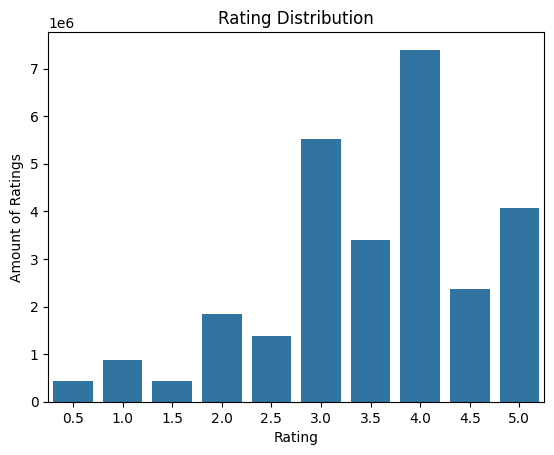

In [15]:
rating_counts = df_ratings["rating"].value_counts()

ax = sns.barplot(x = rating_counts.index, y = rating_counts.values, color = "C0")
ax.set(title = "Rating Distribution", xlabel = "Rating", ylabel = "Amount of Ratings");

### Box plot showing overall rating distribution

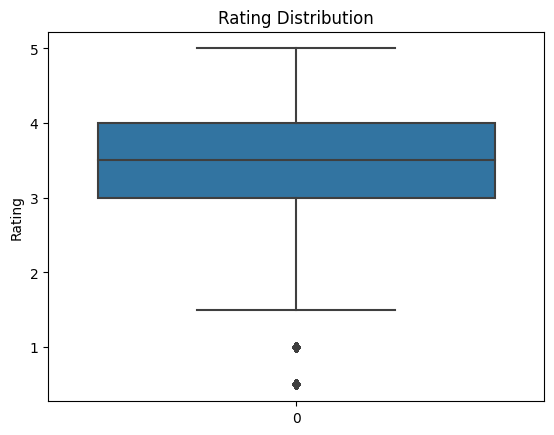

In [16]:
ax = sns.boxplot(df_ratings["rating"]);
ax.set(title = "Rating Distribution", ylabel = "Rating");

# Most rated movies (1 B, C)

### Getting titles, their respective amount of ratings, and mean rating

In [17]:
amount_of_top_movies = 10

In [18]:
head = df_ratings["movieId"].value_counts().head(amount_of_top_movies)

titles, means = [], []

for i in head.index:
    titles.append(df_movies[df_movies["movieId"] == i]["title"].values[0])
    means.append(df_ratings[df_ratings["movieId"] == i]["mean"].values[0])

ratings = head.values

for title, rating, mean in zip(titles, ratings, means):
    print(f"{title} - {rating:,} Ratings ({mean:.1f} average)")

Shawshank Redemption, The  - 97,999 Ratings (4.4 average)
Forrest Gump  - 97,040 Ratings (4.1 average)
Pulp Fiction  - 92,406 Ratings (4.2 average)
Silence of the Lambs, The  - 87,899 Ratings (4.2 average)
Matrix, The  - 84,545 Ratings (4.1 average)
Star Wars: Episode IV - A New Hope  - 81,815 Ratings (4.1 average)
Jurassic Park  - 76,451 Ratings (3.7 average)
Schindler's List  - 71,516 Ratings (4.3 average)
Braveheart  - 68,803 Ratings (4.0 average)
Toy Story  - 68,469 Ratings (3.9 average)


### Plot most rated movies by rating count

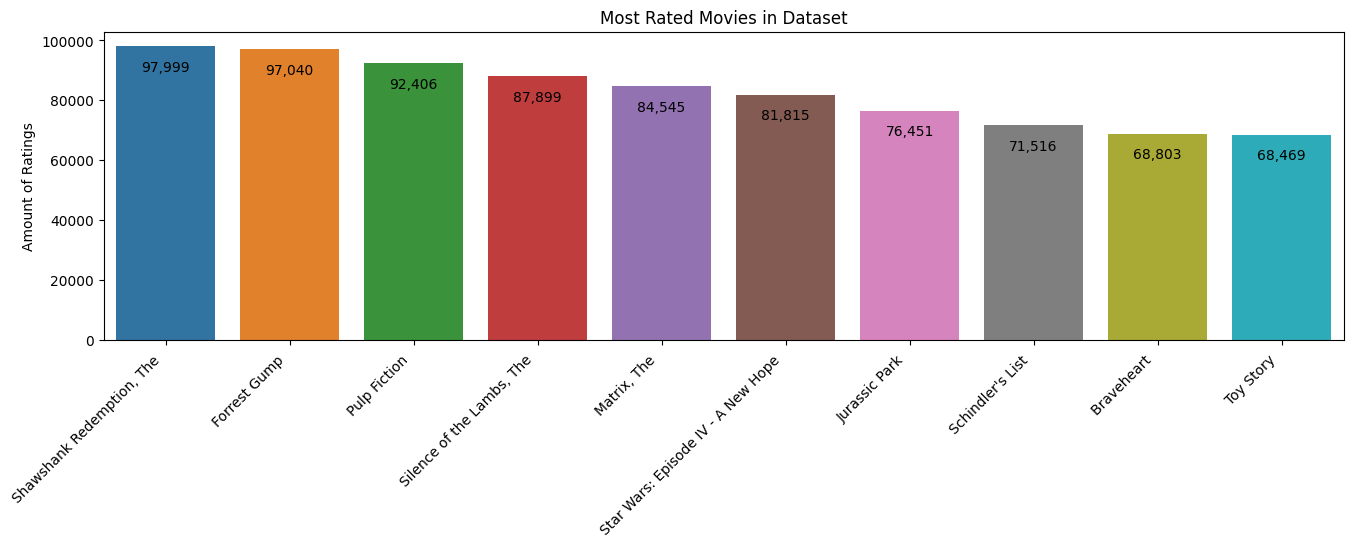

In [19]:
plt.figure(figsize=(16, 4))

ax = sns.barplot(x = titles, y = ratings)

plt.xticks(rotation = 45, ha = "right")

for p in ax.containers: # show averages with 2 decimals on each bar
    ax.bar_label(p, labels=[f"{val:,.0f}" for val in p.datavalues], padding=-20)

ax.set(title = "Most Rated Movies in Dataset", ylabel = "Amount of Ratings");

### Plot most rated movies by average rating (1 F)

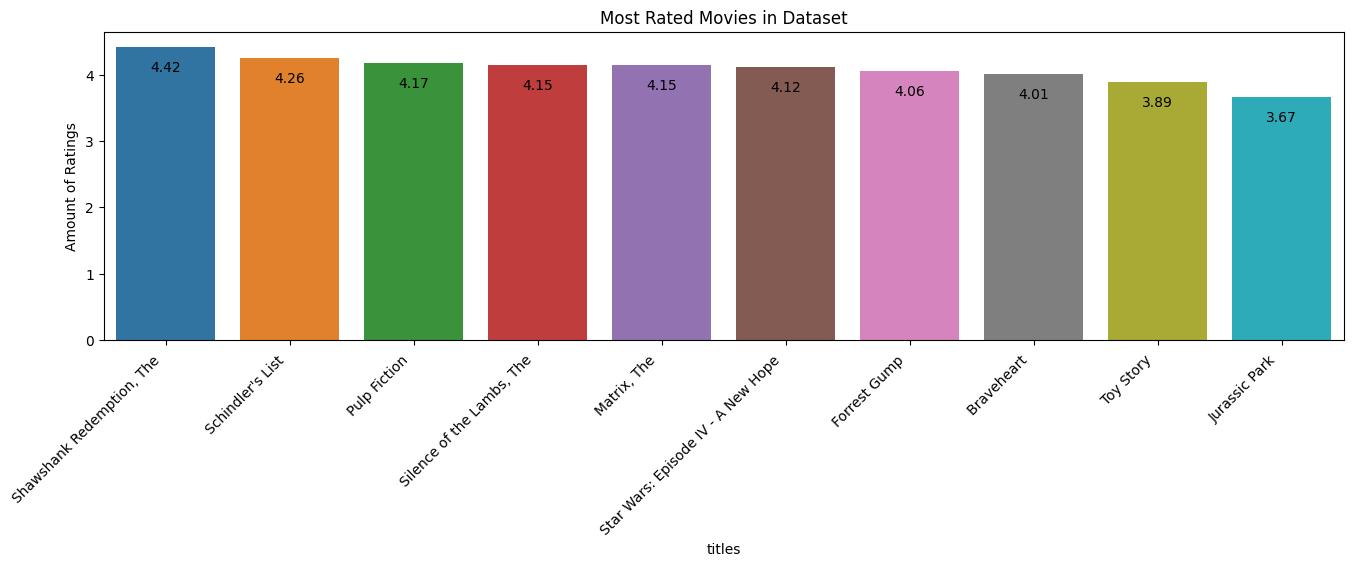

In [20]:
# create and sort dataframe by average rating
data = pd.DataFrame(data = {"titles": titles, "means": means})
data.sort_values(by = "means", ascending = False ,inplace = True)

plt.figure(figsize=(16, 4))

# plot data
ax = sns.barplot(data, x = "titles", y = "means")

# style plot
plt.xticks(rotation = 45, ha = "right") # rotate and adjust label position

for p in ax.containers: # show averages with 2 decimals on each bar
    ax.bar_label(p, labels=[f"{val:.2f}" for val in p.datavalues], padding=-20)

ax.set(title = "Most Rated Movies in Dataset", ylabel = "Amount of Ratings");

# Movies per Year (1 D)

### Count movies released each year

In [21]:
ids = []
years = sorted(df_movies["year"].unique())[1:]

# get all ids for each unique year - used to locate movies in both dataframes based on their movieId
for year in years:
    ids.append(df_movies[df_movies["year"] == year]["movieId"])

df_year_amt_movies = pd.DataFrame(data = {"year": years, "movies": [len(id) for id in ids]})

df_year_amt_movies.head()

,year,movies
0,1874,1
1,1878,1
2,1883,1
3,1887,1
4,1888,4


### Plot movies released each year

Movies not represented due to not having a date: 327


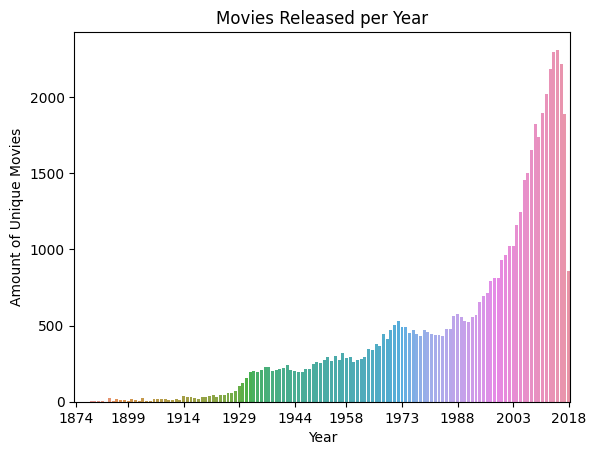

In [22]:
# plot data and set labels
ax = sns.barplot(df_year_amt_movies, x = "year", y = "movies")
ax.set(title = "Movies Released per Year", xlabel = "Year", ylabel = "Amount of Unique Movies")

# set xticks to not be too crowded
plt.xticks(ticks = np.linspace(0, len(df_year_amt_movies) - 1, 10, dtype = int));

# also show amount of movies not represented in graph
print(f"Movies not represented due to not having a date: {len(df_movies[df_movies['year'] == 0]['movieId'])}")

# Movies Rated per Year

### Amount of unique movies that were rated in any given year

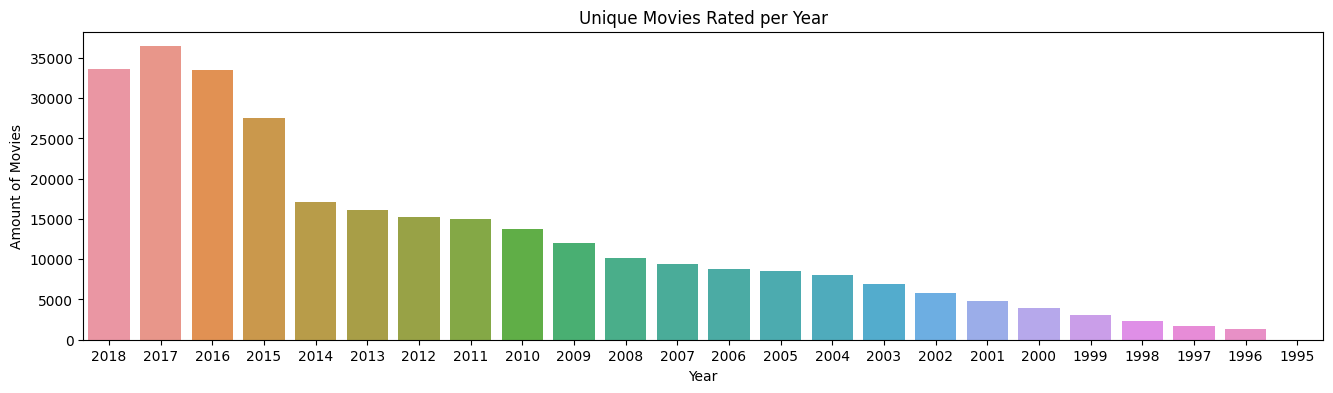

In [23]:
# group by year, then get number of unique movieIds for each year
representation = df_ratings.groupby(df_ratings.timestamp.dt.year)["movieId"].nunique().sort_index(ascending = False)

plt.figure(figsize=(16, 4))

# plot indices (years) against values (n unique movieIds)
ax = sns.barplot(x = representation.index, y = representation.values, order = representation.index)

ax.set(title = "Unique Movies Rated per Year", xlabel = "Year", ylabel = "Amount of Movies");

### Amount of ratings in any given year

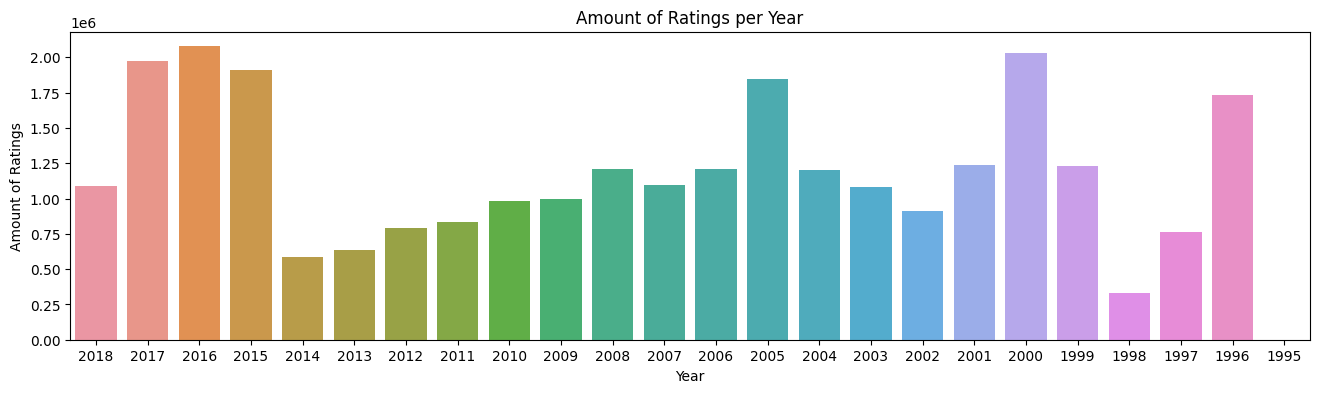

In [24]:
# group by year, then get number of unique movieIds for each year
representation = df_ratings.groupby(df_ratings.timestamp.dt.year)["rating"].count().sort_index(ascending = False)

plt.figure(figsize=(16, 4))

# plot indices (years) against values (n unique movieIds)
ax = sns.barplot(x = representation.index, y = representation.values, order = representation.index)

ax.set(title = "Amount of Ratings per Year", xlabel = "Year", ylabel = "Amount of Ratings");

# Ratings per Movie (1 E)

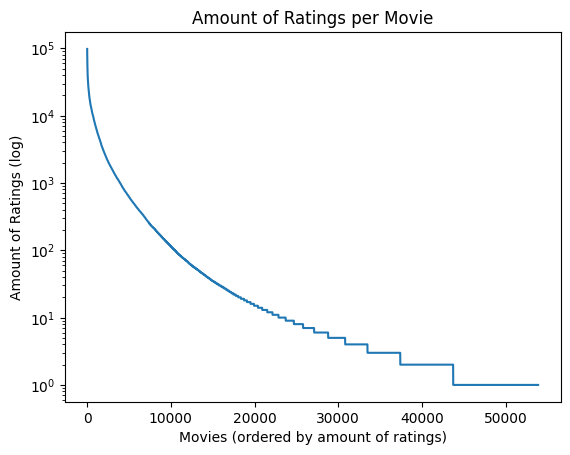

In [25]:
# count ratings for each movie ID, sort from largest to smallest
data = sorted(df_ratings.groupby("movieId")["rating"].count(), reverse = True)
i = [i for i in range(len(data))] # index for data

# plot data
ax = sns.lineplot(x = i, y = data)

ax.set(yscale = "log") # logarithmic scale for better representation

# set labels
ax.set(title = "Amount of Ratings per Movie", xlabel = "Movies (ordered by amount of ratings)", ylabel = "Amount of Ratings (log)");